## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

# The Datas

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
# data preparing
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

df_test = train_normal[(train_normal.simulationRun>5)&(train_normal.simulationRun<10)].iloc[:,3:].reset_index(drop=True)
# IDV = 1
# df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
#                                (test_faulty.simulationRun==1)].iloc[:,3:]

In [5]:
df_train.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [6]:
df_test.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25025,3676.1,4518.7,9.3769,26.748,42.130,2704.3,75.375,120.42,0.33850,...,53.867,24.670,62.322,22.375,39.896,36.040,47.321,47.384,41.161,15.931
1,0.25331,3639.9,4487.0,9.3852,27.153,42.877,2704.6,74.702,120.37,0.33614,...,54.247,24.370,59.331,22.425,40.183,38.570,51.266,47.403,40.431,15.211
2,0.25096,3667.0,4481.4,9.3008,26.742,42.349,2706.5,76.107,120.41,0.33515,...,54.313,24.608,60.264,22.032,40.303,40.878,52.589,47.485,42.107,19.123
3,0.24879,3676.8,4536.7,9.3483,26.752,42.211,2706.3,75.858,120.38,0.33705,...,53.651,24.822,61.995,22.102,40.071,40.130,40.554,47.630,41.308,18.192
4,0.23790,3652.6,4492.4,9.2783,27.071,42.767,2704.7,74.040,120.41,0.32679,...,53.430,23.416,60.937,22.235,38.458,39.328,43.594,47.543,41.020,19.733


## Scaling Training Datas

In [7]:
def scl_pick(name, data):
    """
    the several option for name:
    -std
    -minmax
    -robust
    -norm
    -pwr
    """
    if name == 'std':
        std_scl = StandardScaler().fit(data)
        df_scl = std_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'minmax':
        MM_scl = MinMaxScaler().fit(data)
        df_scl = MM_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'robust':
        rb_scl = RobustScaler().fit(data)
        df_scl = rb_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'norm': ##### xxxxxx
        df_norm = Normalizer().fit(data)
        df_scl = df_norm.transform(data)
        df_scl = pd.DataFrame(df_scl)
    else:
        pt_scl = PowerTransformer().fit(data)
        df_scl = pt_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    return df_scl

### Important Parameters

In [8]:
nComponent = 16 # 30
nSamples = df_train.shape[0]
conf_T2 = 0.92 # 0.99 or 0.95

In [9]:
#-std-minmax-robust-norm-pwr
df_scl = scl_pick('std', df_train) #robust

In [10]:
# df_scl = round(df_scl, 4)

In [11]:
df_scl.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.007459,0.343859,0.502126,-1.431359,-0.084087,0.278542,-0.009557,-0.292773,0.510938,0.098431,...,-0.488936,0.000962,1.050090,-0.051818,-0.122736,1.319983,0.471559,-0.720571,0.279630,0.250397
1,0.017875,-0.103316,1.215653,1.035368,-0.866377,1.068875,0.107804,-0.032734,0.510938,-0.071378,...,-1.237481,-0.024152,-1.590601,-0.185906,0.049624,0.089123,-1.227605,-0.760505,0.460598,-0.634866
2,-0.007459,-0.075750,-0.821517,1.240929,-0.149278,-1.229449,0.308995,-0.467397,1.023929,-0.120262,...,0.901543,0.004238,0.029987,0.562959,0.098256,0.231510,0.029317,-0.740779,0.173916,1.722067
3,-0.029225,-0.045122,0.065220,1.685042,-0.694087,-1.261244,0.476653,0.392438,-0.515042,-0.128838,...,-0.030736,0.025713,-1.110695,0.302375,0.107554,-0.068286,0.381272,-0.649365,0.969458,-0.002535
4,1.550795,0.497001,-0.325151,-0.085064,-0.084087,1.404994,0.124570,0.703725,-0.515042,-0.918704,...,-0.684011,1.507821,-0.418568,-0.532509,-0.688446,1.199804,0.424744,-0.799476,0.725778,0.260288


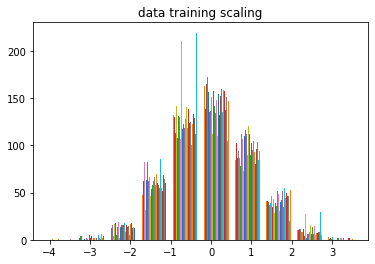

In [124]:
plt.hist(df_scl)
plt.title('data training scaling')
plt.show()

## Training Centraling kernel

In [12]:
# training proccess
A = df_scl
# K = np.matmul(A, A.T)
K = A@A.T

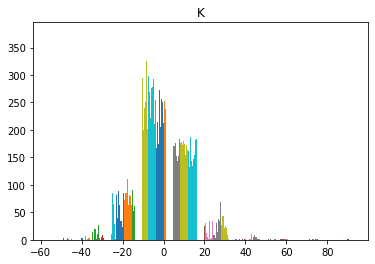

In [13]:
plt.hist(K)
plt.title('K')
plt.show()

In [14]:
K = round(K, 4)

In [15]:
K = pd.DataFrame(K)
K.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.2546,-1.0061,0.0674,-2.9111,7.1808,2.8010,0.0057,1.4510,0.4063,1.5802,...,0.5930,3.8502,-9.1364,4.2919,-3.3995,-10.6717,-3.1036,5.0830,-1.1397,-2.0652
1,-1.0061,15.6481,-1.6439,5.6558,2.5903,-0.4408,6.0022,4.6069,-2.4341,2.6042,...,0.9103,1.0257,-2.7119,0.1541,0.3194,8.1394,5.3727,-5.6364,-8.4340,-1.2430
2,0.0674,-1.6439,26.7531,17.8784,-0.3144,5.1255,3.0532,9.6956,-6.1012,3.9284,...,6.0349,5.8823,9.4580,-6.5917,5.7670,-1.7374,-1.2486,-3.1189,-1.1444,-3.6523
3,-2.9111,5.6558,17.8784,28.0756,-1.2179,1.0285,7.3694,7.8788,-6.3967,-0.0440,...,4.3926,5.6318,7.7203,0.8116,2.4675,7.4404,0.0878,-8.0281,-7.5140,1.3202
4,7.1808,2.5903,-0.3144,-1.2179,40.4632,34.7838,-1.6998,-4.6655,5.3079,4.0269,...,2.6487,6.9229,-7.3993,0.6240,1.2561,-2.8091,-0.0297,7.9712,-3.6725,2.6617


In [16]:
s = (nSamples, nSamples)
unit = np.ones(s)/nSamples

In [17]:
#######
unit = pd.DataFrame(unit)

In [18]:
unit.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [19]:
K_c = K-unit@K-K@unit+unit@K@unit

In [20]:
K_c = round(K_c, 4)

In [21]:
K_c.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.2546,-1.0061,0.0674,-2.9111,7.1808,2.8010,0.0057,1.4510,0.4063,1.5802,...,0.5930,3.8502,-9.1364,4.2919,-3.3995,-10.6717,-3.1036,5.0830,-1.1397,-2.0652
1,-1.0061,15.6481,-1.6439,5.6558,2.5903,-0.4408,6.0022,4.6069,-2.4341,2.6042,...,0.9103,1.0257,-2.7119,0.1541,0.3194,8.1394,5.3727,-5.6364,-8.4340,-1.2430
2,0.0674,-1.6439,26.7531,17.8784,-0.3144,5.1255,3.0532,9.6956,-6.1012,3.9284,...,6.0349,5.8823,9.4580,-6.5917,5.7670,-1.7374,-1.2486,-3.1189,-1.1444,-3.6523
3,-2.9111,5.6558,17.8784,28.0756,-1.2179,1.0285,7.3694,7.8788,-6.3967,-0.0440,...,4.3926,5.6318,7.7203,0.8116,2.4675,7.4404,0.0878,-8.0281,-7.5140,1.3202
4,7.1808,2.5903,-0.3144,-1.2179,40.4632,34.7838,-1.6998,-4.6655,5.3079,4.0269,...,2.6487,6.9229,-7.3993,0.6240,1.2561,-2.8091,-0.0297,7.9712,-3.6725,2.6617


In [22]:
# Compute Eigenvalues and Eigenvector
# eigvls, eigvct = np.linalg.eig(K_c) # K_c
u, s, vh = np.linalg.svd(K_c/nSamples)

In [23]:
# LAMBDA
lambda_ = s
lambd = lambda_

In [24]:
lambd.shape

(500,)

In [25]:
# COEFFICIENT
cf = np.sqrt(nSamples*lambd)
coefficient = np.divide(u, cf.T) # u
# coefficient = np.divide(vh, cf.T) # vh

In [26]:
cf.shape

(500,)

In [27]:
coefficient.shape

(500, 500)

In [28]:
# eigvls = eigvls.real
eigvls = lambd

In [29]:
# eigvct = eigvct.real
eigvct = coefficient

In [30]:
eigvct = pd.DataFrame(eigvct)

In [31]:
eigvct.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.000105,0.000477,-0.000122,0.000811,-0.001505,0.000064,-0.001167,0.000629,-0.000325,0.001204,...,10.083152,7.496293,-6.524933,17.754944,-10.137464,9.398385,-14.582244,-12.176828,-43.442538,20.996854
1,-0.000178,0.000106,0.000391,-0.001443,-0.000515,0.000089,0.000312,-0.000700,0.001253,-0.001811,...,7.171127,-6.085880,-13.487047,1.368614,-18.415453,3.122767,-12.763626,-2.383554,-10.051432,49.627076
2,-0.000149,0.000125,0.000719,0.001335,-0.000942,-0.002309,0.000356,-0.000370,0.001192,-0.001477,...,8.923839,-10.229764,8.474007,14.667617,8.471012,-5.260246,-9.264575,25.567977,9.018188,20.400687
3,-0.000174,0.000067,0.000574,0.000236,-0.000009,-0.000804,0.000018,0.000073,0.002019,-0.002369,...,-0.780264,-4.667133,8.841610,16.247365,-10.739974,-2.740979,28.547725,11.045431,25.301894,34.202195
4,-0.000287,0.000859,0.000617,0.000668,-0.001292,0.001648,-0.001265,0.001282,-0.001864,-0.000639,...,-6.327189,-7.815692,5.273028,-7.071183,24.137368,2.821445,-20.565573,31.546764,-5.530525,-63.019382


In [32]:
eigvls = pd.DataFrame(eigvls)

In [33]:
eigvls = round(eigvls, 4)

In [34]:
eigvls.head()

,0
0,7.4157
1,4.8772
2,2.9170
3,2.2630
4,2.0917


In [35]:
 eigvct.iloc[:,:nComponent]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.000105,0.000477,-0.000122,0.000811,-0.001505,0.000064,-0.001167,0.000629,-0.000325,0.001204,-0.000408,0.001098,-0.000510,0.000348,-0.000891,0.000208
1,-0.000178,0.000106,0.000391,-0.001443,-0.000515,0.000089,0.000312,-0.000700,0.001253,-0.001811,0.000260,-0.000407,-0.000771,-0.000451,0.001210,-0.001233
2,-0.000149,0.000125,0.000719,0.001335,-0.000942,-0.002309,0.000356,-0.000370,0.001192,-0.001477,0.001862,-0.000898,-0.000665,0.001869,0.001183,0.001428
3,-0.000174,0.000067,0.000574,0.000236,-0.000009,-0.000804,0.000018,0.000073,0.002019,-0.002369,0.001528,0.000125,0.000476,0.001006,0.001898,0.001115
4,-0.000287,0.000859,0.000617,0.000668,-0.001292,0.001648,-0.001265,0.001282,-0.001864,-0.000639,0.000299,-0.003548,0.000587,-0.001548,-0.001637,0.001718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000256,-0.000719,0.000564,-0.001085,0.002197,0.001234,0.002049,0.000149,0.001369,-0.003077,0.000878,0.001117,0.002107,-0.001239,0.001061,-0.001238
496,-0.000051,-0.000723,0.000010,-0.002209,-0.000266,-0.001866,-0.001186,-0.001148,0.000779,-0.000153,0.000680,0.000533,0.000979,-0.002007,0.000251,0.000520
497,0.000190,-0.000349,-0.000977,-0.000453,-0.000839,-0.001561,-0.003574,0.000513,-0.001148,0.000184,0.001021,0.000055,0.001349,-0.002050,-0.002169,0.000764
498,-0.000042,-0.000170,-0.001113,0.000964,0.000718,-0.000604,-0.000384,-0.000127,-0.002323,0.000124,0.000912,0.001587,0.002913,-0.000787,0.000197,-0.001817


In [36]:
# score matrix
score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])

C:\Users\m477a\AppData\Local\Temp/ipykernel_8784/485419572.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])


In [37]:
score_train = round(score_train, 4)

In [38]:
score_train = pd.DataFrame(score_train)

In [39]:
score_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.3890,1.1623,-0.1784,0.9177,-1.5744,0.0625,-1.1179,0.5124,-0.2487,0.8591,-0.2701,0.7001,-0.3089,0.2011,-0.5087,0.1123
1,-0.6599,0.2576,0.5698,-1.6324,-0.5389,0.0869,0.2991,-0.5701,0.9584,-1.2918,0.1722,-0.2593,-0.4675,-0.2611,0.6911,-0.6665
2,-0.5514,0.3050,1.0482,1.5101,-0.9849,-2.2676,0.3406,-0.3014,0.9113,-1.0536,1.2337,-0.5730,-0.4030,1.0813,0.6757,0.7721
3,-0.6455,0.1636,0.8370,0.2675,-0.0092,-0.7891,0.0169,0.0593,1.5440,-1.6896,1.0119,0.0800,0.2884,0.5822,1.0841,0.6028
4,-1.0660,2.0936,0.9006,0.7556,-1.3513,1.6183,-1.2116,1.0441,-1.4258,-0.4561,0.1984,-2.2627,0.3561,-0.8953,-0.9349,0.9291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.9481,-1.7525,0.8231,-1.2280,2.2978,1.2122,1.9624,0.1210,1.0467,-2.1946,0.5813,0.7122,1.2771,-0.7165,0.6059,-0.6695
496,-0.1893,-1.7633,0.0140,-2.4990,-0.2784,-1.8322,-1.1354,-0.9352,0.5958,-0.1090,0.4507,0.3397,0.5937,-1.1611,0.1433,0.2810
497,0.7030,-0.8516,-1.4245,-0.5130,-0.8777,-1.5329,-3.4224,0.4179,-0.8778,0.1314,0.6761,0.0350,0.8179,-1.1857,-1.2387,0.4130
498,-0.1561,-0.4147,-1.6232,1.0913,0.7514,-0.5931,-0.3676,-0.1032,-1.7764,0.0884,0.6038,1.0120,1.7659,-0.4551,0.1126,-0.9823


In [40]:
### T2 training Process
a = eigvls.iloc[:nComponent,:]
b = np.zeros((nComponent, nComponent), int)
np.fill_diagonal(b, a)
# fill the diagonal not in real number
# good if the number is double format !!!!!!!!!!!!!!!!!!!!!!

In [41]:
a

,0
0,7.4157
1,4.8772
2,2.9170
3,2.2630
4,2.0917
5,1.9641
6,1.9152
7,1.6285
8,1.5295
9,1.4266


In [42]:
type(a)

pandas.core.frame.DataFrame

In [43]:
z = a.values.tolist()

In [44]:
len(z)

16

In [45]:
z[1][0]

4.8772

In [46]:
z[0][0]

7.4157

In [47]:
extract_egv=[]
for i in range(len(z)):
    extract_egv.append(z[i][0])
#     print(z[i][0])


In [48]:
extract_egv

[7.4157,
 4.8772,
 2.917,
 2.263,
 2.0917,
 1.9641,
 1.9152,
 1.6285,
 1.5295,
 1.4266,
 1.3248,
 1.2755,
 1.2125,
 1.157,
 1.1422,
 1.0814]

In [49]:
# c = np.matrix(extract_egv)

In [50]:
c = np.diag(extract_egv)

In [51]:
c

array([[7.4157, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 4.8772, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 2.917 , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 2.263 , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 2.0917, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.9641, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.9152, 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.

In [52]:
c.shape

(16, 16)

In [53]:
b.shape

(16, 16)

In [54]:
b # !!!!!COUTION!!!!!

array([[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [55]:
# invegvldiag = np.linalg.inv(b)
# invegvldiag = np.linalg.inv(c) # this is making the value so low
invegvldiag = c

In [56]:
invegvldiag.shape

(16, 16)

In [57]:
invegvldiag = pd.DataFrame(invegvldiag)

In [58]:
invegvldiag

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,7.4157,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
1,0.0000,4.8772,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
2,0.0000,0.0000,2.917,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
3,0.0000,0.0000,0.000,2.263,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
4,0.0000,0.0000,0.000,0.000,2.0917,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
5,0.0000,0.0000,0.000,0.000,0.0000,1.9641,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
6,0.0000,0.0000,0.000,0.000,0.0000,0.0000,1.9152,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
7,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,1.6285,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
8,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,1.5295,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
9,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,1.4266,0.0000,0.0000,0.0000,0.000,0.0000,0.0000


In [59]:
T2_train = score_train@invegvldiag@score_train.T

In [60]:
# T2_train = round(T2_train, 4)

In [61]:
T2_train.shape

(500, 500)

In [62]:
T2_train.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,20.064105,-2.262551,5.407219,-0.621797,22.363951,17.507985,0.932204,2.831217,2.608601,-0.406580,...,-1.757866,2.538031,-13.639424,4.639330,-5.413831,-25.435154,-13.064147,3.670716,-0.116161,1.077978
1,-2.262551,17.133568,4.070493,9.261054,4.893655,7.825935,5.035958,11.818918,1.460069,8.467569,...,-0.837000,0.279551,-0.098166,-6.642341,8.624941,12.900034,9.174353,-9.370592,-10.579907,-10.265188
2,5.407219,4.070493,31.577291,18.086026,6.518820,9.331773,1.146271,12.290549,-7.690971,11.687549,...,12.871801,8.760264,0.256256,-25.337943,8.949570,-5.746522,-1.808811,-6.888039,-4.835054,2.449433
3,-0.621797,9.261054,18.086026,17.967245,3.745784,4.694944,1.299490,7.997788,-7.444986,8.436469,...,5.379144,4.783717,-3.579993,-16.081800,8.585188,11.449923,2.833269,-8.767937,-5.688617,6.111795
4,22.363951,4.893655,6.518820,3.745784,60.013921,58.820148,-3.527804,0.487346,15.302747,10.633613,...,-6.091384,2.603225,-18.139193,0.092369,-0.654587,-20.110293,-25.238931,-7.387221,-7.549064,6.405594


In [63]:
# here the data is from training data 
# or with using same data
T2_tfinal = np.diag(T2_train)

In [64]:
T2_tfinal

array([ 20.06410534,  17.13356805,  31.57729109,  17.96724498,
        60.01392109,  73.57138485,  20.69971773,  26.75378575,
        45.55946068,  89.28672287,  50.20350996,  29.67039613,
        23.11270091,  46.31199509,  62.12537431, 123.63951942,
        37.79833929,  55.1352752 ,  62.11333084,  36.49453737,
        64.72843057,  57.29000657,  55.07678532,  62.31894957,
        79.22266171,  76.09582623,  66.93273191,  67.77945238,
        60.59398572,  51.43206619,  78.68884007, 104.30333661,
       130.42941681, 112.62942674, 124.79532463, 133.11724262,
       144.07527715, 118.88065709, 139.34458467, 162.44388393,
       140.73309231, 154.34073166,  83.61047055,  89.51163164,
        78.12363967, 188.4880916 , 129.97576039, 185.28078684,
        79.26185343, 100.64652289, 136.32125441, 124.85116109,
       121.85457456, 114.8956619 , 110.93928462, 116.65978355,
        87.99168579,  63.87952353, 116.86930556, 127.71046859,
       153.83640953, 179.95248007, 116.80480894, 136.71

In [65]:
### T2 limit
# im using 16 component
# nComponent = 30
# nSamples = df_train.shape[0]
# conf_T2 = 0.99

In [66]:
from scipy.stats import f
F = f.ppf(conf_T2, nComponent, nSamples-nComponent)
T2_trlim = ((nComponent*(nSamples**2-1))/(nSamples*(nSamples-nComponent)))*F

In [67]:
T2_trlim
# conf_T2 = 0.95, T2_trlim = 47.3464294521146
# conf_T2 = 0.99, T2_trlim = 55.46204002064628

25.537906838592278

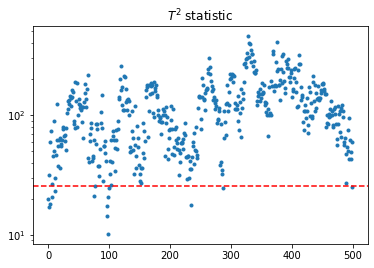

In [68]:
# plotting the result
plt.semilogy(T2_tfinal,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()
# in this scatter plot the data has been use is
# training data it self 

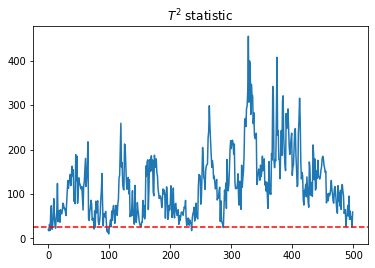

In [69]:
plt.plot(T2_tfinal)
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [70]:
print(f'T2: {(T2_tfinal>T2_trlim).sum()/T2_tfinal.shape[0]}')
# ofcourse 100% because we using train and test in the same dataset

T2: 0.97


## Scaling Testing Data

In [71]:
X_ts = scl_pick('std', df_test) ##robust

In [72]:
X_ts = round(X_ts, 4)

In [73]:
X_ts

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0026,0.3651,0.2699,0.3347,-0.7111,-0.9676,-0.1787,0.6909,1.0440,0.1237,...,-0.2658,0.0226,0.8418,0.2861,-0.0898,-0.6886,0.3738,-0.2311,0.1161,-1.4720
1,0.1012,-0.6851,-0.5414,0.4295,1.2144,2.4034,-0.1390,-0.5592,-1.6050,-0.0636,...,0.5275,-0.0753,-1.5869,0.3743,0.0953,0.1563,2.0125,-0.2243,-1.2538,-1.9615
2,0.0255,0.1011,-0.6847,-0.5349,-0.7397,0.0207,0.1126,2.0507,0.5142,-0.1422,...,0.6653,0.0023,-0.8293,-0.3195,0.1727,0.9271,2.5620,-0.1945,1.8914,0.6980
3,-0.0444,0.3855,0.7305,0.0079,-0.6921,-0.6021,0.0861,1.5882,-1.0752,0.0086,...,-0.7166,0.0722,0.5763,-0.1959,0.0231,0.6773,-2.4370,-0.1420,0.3920,0.0650
4,-0.3952,-0.3166,-0.4032,-0.7920,0.8245,1.9070,-0.1258,-1.7890,0.5142,-0.8057,...,-1.1780,-0.3868,-0.2828,0.0389,-1.0175,0.4095,-1.1743,-0.1735,-0.1485,1.1126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.1424,-0.8476,0.2008,0.3941,1.3808,-0.8909,-0.8674,0.1411,-1.0752,-0.2811,...,-0.9463,0.1173,1.3469,-0.3777,-0.2085,0.3644,0.0739,1.0983,-0.3099,0.0854
1996,1.8542,0.4928,1.0811,0.6752,-1.5099,-0.0064,-0.5363,-0.3697,0.5142,0.8459,...,0.3438,1.8349,-0.6847,-1.6136,0.6572,-1.1037,-0.8295,1.0874,1.0094,-1.5958
1997,1.8201,-0.1542,-0.2215,2.3435,1.0289,1.4602,-0.5098,0.3696,-0.0156,0.6419,...,1.6151,1.8692,-1.5130,-1.6348,0.8598,0.9662,1.2544,1.1146,-1.0699,0.4376
1998,0.1524,0.7075,0.7689,1.2660,-0.1549,1.2707,-0.4039,0.5349,2.1036,0.0975,...,0.3396,0.1812,-0.2990,-0.7750,0.0076,1.6244,-0.3684,1.2154,0.8274,-1.5176


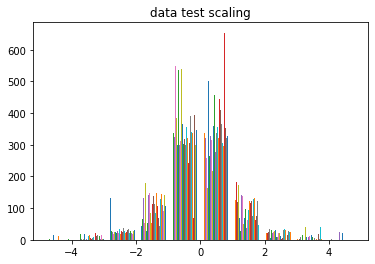

In [125]:
plt.hist(X_ts)
plt.title('data test scaling')
plt.show()

In [74]:
df_scl

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.007459,0.343859,0.502126,-1.431359,-0.084087,0.278542,-0.009557,-0.292773,0.510938,0.098431,...,-0.488936,0.000962,1.050090,-0.051818,-0.122736,1.319983,0.471559,-0.720571,0.279630,0.250397
1,0.017875,-0.103316,1.215653,1.035368,-0.866377,1.068875,0.107804,-0.032734,0.510938,-0.071378,...,-1.237481,-0.024152,-1.590601,-0.185906,0.049624,0.089123,-1.227605,-0.760505,0.460598,-0.634866
2,-0.007459,-0.075750,-0.821517,1.240929,-0.149278,-1.229449,0.308995,-0.467397,1.023929,-0.120262,...,0.901543,0.004238,0.029987,0.562959,0.098256,0.231510,0.029317,-0.740779,0.173916,1.722067
3,-0.029225,-0.045122,0.065220,1.685042,-0.694087,-1.261244,0.476653,0.392438,-0.515042,-0.128838,...,-0.030736,0.025713,-1.110695,0.302375,0.107554,-0.068286,0.381272,-0.649365,0.969458,-0.002535
4,1.550795,0.497001,-0.325151,-0.085064,-0.084087,1.404994,0.124570,0.703725,-0.515042,-0.918704,...,-0.684011,1.507821,-0.418568,-0.532509,-0.688446,1.199804,0.424744,-0.799476,0.725778,0.260288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.163035,-0.333028,-0.133843,1.615252,-1.429812,-0.130251,0.476653,-0.748315,-0.002052,-1.133966,...,0.391172,-0.360829,-1.326130,0.818484,-0.825761,-1.564979,-0.596009,0.429321,-0.080515,-1.161925
496,-0.571599,0.006947,0.515052,-0.010199,-0.163247,0.423891,-0.043088,0.200731,-0.002052,1.501493,...,0.155266,-0.683676,-0.539952,0.201177,2.053568,-0.086248,-1.668594,0.513518,0.424762,-0.464596
497,-0.710404,-0.195201,-0.428561,-0.596428,0.060264,0.887190,-0.680190,-0.142824,-0.515042,1.848829,...,1.146522,-0.544637,0.694782,-1.311733,1.699552,0.893150,0.064011,0.524584,0.313673,0.157137
498,-0.283998,-0.927219,0.308233,0.592525,0.227898,-0.107540,-0.411937,-0.222544,-1.541023,0.303401,...,1.298499,-0.461651,1.548485,1.273875,-0.392360,-0.127070,0.350758,0.627545,-0.976396,0.780990


## Testing Process using Normal Dataset 

In [75]:
# linear kernel
# Kt = np.matmul(X_ts, df_train.T)
Kt = np.matmul(X_ts, df_scl.T)

C:\Users\m477a\AppData\Local\Temp/ipykernel_8784/1694315934.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Kt = np.matmul(X_ts, df_scl.T)


In [76]:
Kt.shape

(2000, 500)

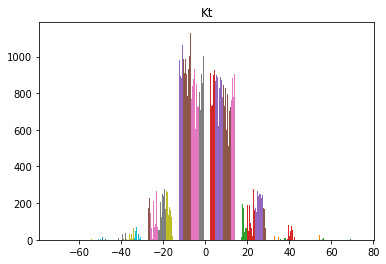

In [77]:
plt.hist(Kt)
plt.title('Kt')
plt.show()

In [78]:
# Kt

In [79]:
# centralize the kernel
st = (len(X_ts),len(df_train)) # 2000 or 960
unit_t = np.ones(st)/len(df_train)

In [80]:
#######
unit_t = pd.DataFrame(unit_t)

In [81]:
unit_t

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1996,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1997,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1998,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [82]:
Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit
# the result are NaN

In [83]:
Kt_c = round(Kt_c, 4)

In [84]:
Kt_c

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.6289,0.9060,-4.0662,2.4642,-2.9974,-3.1695,3.3708,-0.4704,-2.4411,-0.5296,...,-6.3831,0.8513,2.0701,7.9550,-5.6627,3.9446,-1.3967,-0.9623,-2.5832,-1.0449
1,-1.5811,0.1530,-9.2776,0.3951,4.3314,-1.0268,-2.3032,-3.5360,4.4956,-9.0719,...,-1.1037,-1.3611,-3.5530,16.4052,-3.5088,3.8032,-4.9841,2.0554,1.6501,17.2528
2,3.7720,-5.5447,10.4793,12.0165,3.4317,-0.6239,-0.2566,-4.9396,-10.0674,2.5970,...,2.3519,5.8730,0.6310,9.1658,0.9667,-5.3859,-7.2175,-0.2755,-4.3783,11.1020
3,-0.1334,7.9443,4.6449,10.5122,-4.5408,-10.4906,7.7444,9.2618,-1.1518,-8.1986,...,-4.9648,-9.6546,4.7692,-2.0399,-0.9167,3.3312,7.0395,-4.1171,-5.3652,-11.7010
4,3.2109,4.4823,-1.3871,-7.3820,10.5803,7.0647,-1.3723,6.9745,1.2519,-0.8746,...,6.7427,2.0788,-5.4818,-8.7334,7.9030,2.2938,1.8805,1.3071,-1.1567,-2.6639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.9158,-5.8954,0.0381,0.1905,-2.5424,-2.9060,-1.5991,-0.3721,-0.8218,-9.2763,...,-0.1767,-1.7402,-6.9983,-8.4692,1.9516,-0.8772,-3.9510,-1.3758,7.6816,4.6769
1996,-8.3922,6.6267,-7.9222,1.4692,-0.9445,-4.6046,-1.7096,-7.3825,-2.1680,3.7503,...,-0.1062,4.3621,15.5989,14.8060,-0.8814,14.8551,7.5673,-1.8712,-2.1669,-2.0149
1997,-4.0755,-4.0312,-0.6799,-1.0568,10.7642,7.4575,-14.6388,-9.1693,3.7343,-2.3938,...,-3.4157,5.5184,18.4892,16.5164,-2.6164,-1.8528,-1.5770,10.6478,8.7060,22.9540
1998,-0.0724,3.7377,-0.6903,-1.7563,5.5177,1.1977,0.7749,2.4325,-23.7556,-10.2547,...,3.6523,16.8524,-14.6476,4.0207,-8.0666,-7.6458,11.4412,10.1550,-6.7117,-2.8091


In [85]:
score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])

C:\Users\m477a\AppData\Local\Temp/ipykernel_8784/2005656394.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])


In [86]:
score_test = round(score_test, 4)

In [87]:
score_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.0558,0.3423,-0.2334,-1.3331,1.0851,1.0401,-0.6927,0.5565,0.1392,-0.0404,0.1108,0.8667,-0.4963,-0.1270,-0.7957,0.0818
1,0.1476,0.4219,-1.1503,0.5305,1.4935,3.1926,-2.2010,0.1365,0.1870,-1.1792,-0.0095,-0.6837,0.8211,0.4601,1.6294,0.3363
2,0.4759,0.2975,0.9828,2.9782,-0.1629,0.0457,-1.4978,1.1079,1.9045,0.6714,1.0616,0.6819,0.0426,0.1540,-0.3219,0.8987
3,0.2890,-0.2047,-0.4093,-2.0298,-2.0621,-1.6758,1.8188,-0.6760,0.0412,0.4538,0.1230,0.6462,0.3143,-0.2537,0.5617,0.6589
4,-0.4394,-0.2594,0.9960,0.4224,-1.7907,-0.3318,1.1547,0.3214,-0.8992,-0.7692,-1.1924,-1.0843,-0.4694,0.1342,0.0778,1.6498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.1325,-0.3124,-1.0226,0.4381,-0.6998,0.3524,1.0145,0.3822,0.4612,0.5200,0.2191,-0.2337,1.7274,-0.0635,0.0510,0.9692
1996,2.1482,-0.9896,2.1694,-2.8496,0.8605,1.3695,-0.0074,-1.3315,0.6532,-0.4522,-0.0090,0.5496,1.9213,-1.3130,-1.3136,0.6679
1997,1.9294,-0.4837,1.0387,1.3951,-0.7666,1.2775,-2.0384,-0.6272,-0.5780,-1.1828,0.8471,-1.5988,2.6805,-2.1648,-0.0809,1.0635
1998,1.4774,-0.5420,0.6274,-1.9921,-2.0828,1.0988,-1.7914,1.1497,2.4063,0.3736,1.7214,-1.5012,0.3912,0.4729,-0.2371,-1.4417


In [88]:
T2_test = score_test@invegvldiag@score_test.T
T2_test_final = np.diag(T2_test)

In [89]:
T2_test = round(T2_test, 4)

In [90]:
T2_test

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,12.8402,10.1193,-5.0391,-5.0775,-9.3693,4.5410,7.1161,8.1569,-0.5124,-8.3190,...,8.2806,2.6057,7.3124,-8.1138,7.7715,-5.0461,9.1937,-6.3415,3.8693,-6.0234
1,10.1193,46.3705,6.4078,-25.7895,-13.9740,-1.6056,10.6460,25.8551,4.0533,-3.9092,...,6.2452,1.0901,6.6831,-17.8704,23.5832,3.0722,0.1061,18.3356,5.2184,7.5378
2,-5.0391,6.4078,40.6541,-18.3209,-2.7787,-9.6479,4.3279,3.6574,-4.7712,1.2466,...,2.8545,14.9218,8.3667,4.9618,11.5734,8.0906,-6.4597,21.3794,8.0945,17.1600
3,-5.0775,-25.7895,-18.3209,33.9993,8.0367,4.1085,-4.8525,-10.1688,10.9798,9.5207,...,6.2620,-5.4715,-0.3729,22.9495,-4.1719,10.6713,10.2627,-9.9579,8.2378,-4.2466
4,-9.3693,-13.9740,-2.7787,8.0367,23.4050,11.7849,-9.6164,-11.7345,-10.0592,2.4507,...,-9.5557,-8.3029,-13.3848,3.0856,-23.3775,-4.7577,-8.3683,-1.1265,-7.5893,-10.4216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-5.0461,3.0722,8.0906,10.6713,-4.7577,1.4104,12.8485,14.0129,25.7329,13.7604,...,32.0028,34.6271,35.7858,43.0383,55.1588,46.6471,29.7312,33.5092,23.5686,33.2884
1996,9.1937,0.1061,-6.4597,10.2627,-8.3683,3.3882,22.0322,9.7028,0.8550,-3.3255,...,52.7627,37.4895,52.1095,37.3711,52.2590,29.7312,89.4756,43.5698,40.3049,26.1670
1997,-6.3415,18.3356,21.3794,-9.9579,-1.1265,2.0610,11.6927,13.6199,2.8137,0.4887,...,19.5629,32.7099,30.9920,34.2446,48.3321,33.5092,43.5698,71.4138,30.6311,35.4463
1998,3.8693,5.2184,8.0945,8.2378,-7.5893,4.8845,28.0146,14.3625,11.4112,7.8377,...,30.1382,21.6362,41.7302,51.1825,30.2903,23.5686,40.3049,30.6311,66.1036,22.3389


In [91]:
T2_test_final = np.diag(T2_test)

In [92]:
T2_test_final

array([12.8402, 46.3705, 40.6541, ..., 71.4138, 66.1036, 47.5402])

In [93]:
T2_test_final.shape

(2000,)

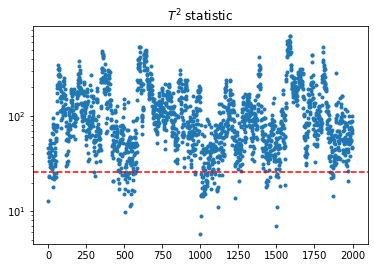

In [94]:
plt.figure(figsize=(6,4))
plt.semilogy(T2_test_final,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

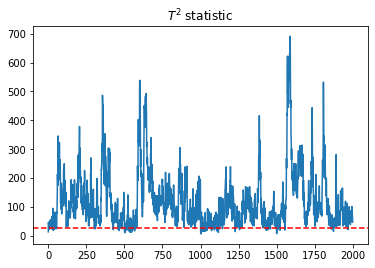

In [95]:
plt.figure(figsize=(6,4))
plt.plot(T2_test_final)
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [96]:
print(f'T2: {(T2_test_final>T2_trlim).sum()/T2_test_final.shape[0]}')

T2: 0.9495


## Testing Process using Faulty Dataset 

In [97]:
## STEPs
# 1-standardize the data
# 2-linear kernel
# 3-Centralize the kernel
# 4-Score faulty
# 5-T2 faulty

### The Data

In [98]:
IDV = 1
df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
                               (test_faulty.simulationRun==1)].iloc[:,3:]

In [99]:
# Scaling the data
X_ts = scl_pick('std', df_test)

In [100]:
X_ts

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-2.032077,0.274369,-0.283462,2.131759,0.748241,0.700908,-0.043226,-0.291872,0.518418,0.665952,...,0.964565,-2.043364,0.649894,0.182801,0.666129,0.610804,0.624495,-1.014017,1.495361,-1.732594
1,-2.029050,-0.573262,1.206104,1.795302,0.478652,1.171492,-0.057380,0.078948,-1.017636,0.737980,...,-0.531646,-2.046391,0.988141,0.219955,0.596054,-0.514721,-0.615276,-0.997290,-0.667563,-1.274026
2,-2.047981,-0.548001,0.315856,1.366896,0.143989,-0.111161,-0.117536,-0.498980,-1.017636,0.693132,...,0.361195,-2.027102,1.066886,0.077973,0.638898,1.200694,-0.821408,-0.999194,0.434172,1.529115
3,-2.032942,-0.963397,0.487505,1.520488,0.478652,0.105391,-0.103382,-0.182401,-1.017636,0.668670,...,0.190200,-2.042094,1.633316,-0.066664,0.663224,0.608173,0.664022,-1.002424,-0.350185,-0.597031
4,-2.195823,-0.191547,1.239561,1.430950,0.023139,0.405232,0.031084,-0.656776,0.006400,-0.026248,...,-0.485233,-2.177751,1.625710,0.219292,-0.224509,0.025846,-0.768281,-0.994971,0.081841,0.398023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.420413,-0.368371,-0.091448,-0.227229,-1.547917,0.446877,-0.138768,-0.853035,-0.505618,-0.517764,...,0.783799,0.415853,-0.042707,-0.147607,-0.591221,-0.228326,0.884180,-0.761368,-1.359642,0.468916
956,0.369002,0.007730,-0.295099,-0.777890,1.431511,-1.418800,-0.160000,0.702243,0.518418,-1.026494,...,0.328217,0.370634,0.053935,-0.173482,-0.701235,-0.974401,0.322309,-0.763355,0.674652,0.265818
957,0.365206,-0.758506,0.102021,0.415724,-0.014046,0.505179,-0.206001,-0.555195,-1.017636,-0.903275,...,-0.069958,0.374442,-1.649381,-0.188079,-0.822141,-0.492033,-0.282913,-0.758055,-0.740266,1.810132
958,0.405422,-0.222421,-0.175818,-0.242726,0.399634,0.197009,-0.276773,-0.541387,-1.529654,-0.037573,...,-0.477905,0.413753,-1.162144,-0.351292,-0.187112,0.118243,-0.102282,-0.787784,-1.105180,1.183593


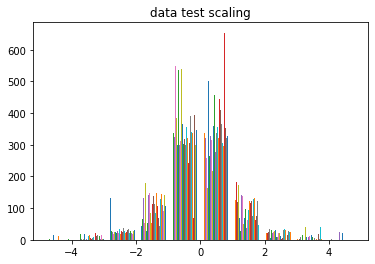

In [126]:
plt.hist(X_ts)
plt.title('data test scaling')
plt.show()

In [101]:
# Kt = np.matmul(X_ts, df_scl.T)
Kt = X_ts@df_scl.T

In [102]:
Kt

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2.453018,4.305422,1.375915,7.214473,-1.429239,-6.107070,2.390238,5.136672,-5.386992,-2.279073,...,-1.853687,9.217334,-0.443192,10.609782,-0.232004,3.378235,4.664616,6.553498,-1.658749,6.017663
1,-0.809356,9.517926,-3.132328,6.855571,-5.591185,-11.505501,9.415442,8.813283,-1.620328,-11.746601,...,-1.622425,-3.488638,-1.575327,-1.679155,-5.066641,7.782569,7.089664,1.914781,1.597111,5.454128
2,4.895180,2.773035,11.260796,6.505250,-3.060854,-5.039343,3.520801,8.886146,-1.327425,-5.084270,...,1.513334,0.092079,3.692067,-7.823209,2.271910,-7.101379,5.733558,9.260480,2.929893,-1.965449
3,3.513887,1.322032,2.994476,7.537675,-5.091701,-8.438215,4.811420,6.091585,-1.966096,-8.050859,...,-0.617199,0.605441,1.382119,3.628747,-3.203039,-3.116042,2.786581,7.913995,2.557986,3.740084
4,2.230114,5.419748,3.770302,-0.029823,-4.622934,-4.786231,7.258955,6.467339,-6.655872,-0.595796,...,0.322269,-1.427121,-10.295897,-12.400699,3.514553,2.689356,5.046735,-0.775737,1.814049,-3.778696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.053375,-1.961520,5.365646,1.894508,4.210785,5.179273,1.847667,-1.866150,2.425911,4.740412,...,1.919743,-2.005987,5.448067,4.448564,3.077036,4.103580,-3.906147,-1.012879,3.320914,-0.528981
956,-0.289533,-2.742045,4.178728,5.483557,-1.857380,2.289665,0.773763,2.691441,9.466643,7.055389,...,-3.176170,-4.729038,1.656539,-5.107150,5.978998,6.277063,-5.888306,-8.432910,-1.945377,0.982962
957,-1.730654,2.818927,6.550946,4.134668,4.109284,7.831122,0.854377,1.768002,8.951192,3.684457,...,-0.414642,-6.306147,6.673397,-9.410418,7.658920,6.627778,-3.564329,-3.840236,3.764344,6.952407
958,1.156418,0.406208,9.640826,6.280594,6.807011,10.648425,3.134946,2.502731,7.556841,-2.313546,...,0.250914,-5.209773,6.485563,0.853681,3.347469,-1.190644,-2.905322,0.646179,2.613489,1.801885


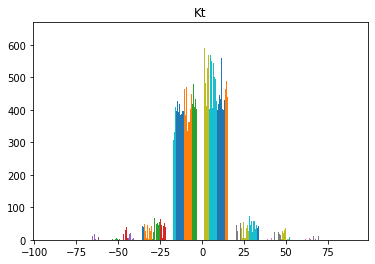

In [103]:
plt.hist(Kt)
plt.title('Kt')
plt.show()

In [104]:
# centralize the kernel
st = (len(X_ts),len(df_train)) # 2000 or 960
unit_t = np.ones(st)/len(df_train)

In [105]:
#######
unit_t = pd.DataFrame(unit_t)

In [106]:
unit_t.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [107]:
unit_t.shape

(960, 500)

In [108]:
Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit
# the result are NaN

In [109]:
Kt_c = round(Kt_c, 4)
# Kt_c

In [110]:
Kt_c

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2.4530,4.3054,1.3759,7.2145,-1.4292,-6.1071,2.3902,5.1367,-5.3870,-2.2791,...,-1.8537,9.2173,-0.4432,10.6098,-0.2320,3.3782,4.6646,6.5535,-1.6587,6.0177
1,-0.8094,9.5179,-3.1323,6.8556,-5.5912,-11.5055,9.4154,8.8133,-1.6203,-11.7466,...,-1.6224,-3.4886,-1.5753,-1.6792,-5.0666,7.7826,7.0897,1.9148,1.5971,5.4541
2,4.8952,2.7730,11.2608,6.5052,-3.0609,-5.0393,3.5208,8.8861,-1.3274,-5.0843,...,1.5133,0.0921,3.6921,-7.8232,2.2719,-7.1014,5.7336,9.2605,2.9299,-1.9654
3,3.5139,1.3220,2.9945,7.5377,-5.0917,-8.4382,4.8114,6.0916,-1.9661,-8.0509,...,-0.6172,0.6054,1.3821,3.6287,-3.2030,-3.1160,2.7866,7.9140,2.5580,3.7401
4,2.2301,5.4197,3.7703,-0.0298,-4.6229,-4.7862,7.2590,6.4673,-6.6559,-0.5958,...,0.3223,-1.4271,-10.2959,-12.4007,3.5146,2.6894,5.0467,-0.7757,1.8140,-3.7787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.0534,-1.9615,5.3656,1.8945,4.2108,5.1793,1.8477,-1.8662,2.4259,4.7404,...,1.9197,-2.0060,5.4481,4.4486,3.0770,4.1036,-3.9061,-1.0129,3.3209,-0.5290
956,-0.2895,-2.7420,4.1787,5.4836,-1.8574,2.2897,0.7738,2.6914,9.4666,7.0554,...,-3.1762,-4.7290,1.6565,-5.1071,5.9790,6.2771,-5.8883,-8.4329,-1.9454,0.9830
957,-1.7307,2.8189,6.5509,4.1347,4.1093,7.8311,0.8544,1.7680,8.9512,3.6845,...,-0.4146,-6.3061,6.6734,-9.4104,7.6589,6.6278,-3.5643,-3.8402,3.7643,6.9524
958,1.1564,0.4062,9.6408,6.2806,6.8070,10.6484,3.1349,2.5027,7.5568,-2.3135,...,0.2509,-5.2098,6.4856,0.8537,3.3475,-1.1906,-2.9053,0.6462,2.6135,1.8019


In [111]:
coeff = eigvct.iloc[:,:nComponent]

In [112]:
coeff

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.000105,0.000477,-0.000122,0.000811,-0.001505,0.000064,-0.001167,0.000629,-0.000325,0.001204,-0.000408,0.001098,-0.000510,0.000348,-0.000891,0.000208
1,-0.000178,0.000106,0.000391,-0.001443,-0.000515,0.000089,0.000312,-0.000700,0.001253,-0.001811,0.000260,-0.000407,-0.000771,-0.000451,0.001210,-0.001233
2,-0.000149,0.000125,0.000719,0.001335,-0.000942,-0.002309,0.000356,-0.000370,0.001192,-0.001477,0.001862,-0.000898,-0.000665,0.001869,0.001183,0.001428
3,-0.000174,0.000067,0.000574,0.000236,-0.000009,-0.000804,0.000018,0.000073,0.002019,-0.002369,0.001528,0.000125,0.000476,0.001006,0.001898,0.001115
4,-0.000287,0.000859,0.000617,0.000668,-0.001292,0.001648,-0.001265,0.001282,-0.001864,-0.000639,0.000299,-0.003548,0.000587,-0.001548,-0.001637,0.001718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000256,-0.000719,0.000564,-0.001085,0.002197,0.001234,0.002049,0.000149,0.001369,-0.003077,0.000878,0.001117,0.002107,-0.001239,0.001061,-0.001238
496,-0.000051,-0.000723,0.000010,-0.002209,-0.000266,-0.001866,-0.001186,-0.001148,0.000779,-0.000153,0.000680,0.000533,0.000979,-0.002007,0.000251,0.000520
497,0.000190,-0.000349,-0.000977,-0.000453,-0.000839,-0.001561,-0.003574,0.000513,-0.001148,0.000184,0.001021,0.000055,0.001349,-0.002050,-0.002169,0.000764
498,-0.000042,-0.000170,-0.001113,0.000964,0.000718,-0.000604,-0.000384,-0.000127,-0.002323,0.000124,0.000912,0.001587,0.002913,-0.000787,0.000197,-0.001817


In [113]:
# score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])
score_test = Kt_c@coeff
score_test = round(score_test, 4)

In [114]:
score_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.3604,-0.2531,-0.6993,-0.8177,0.0786,0.6856,-2.7665,0.9577,2.2987,-0.9493,-0.3551,0.8932,-1.1865,0.9162,1.6474,0.3252
1,-1.3918,-0.1098,-1.6372,-1.7064,1.0007,-0.6040,-1.1605,0.0020,0.7224,-1.0358,-1.1129,0.6940,-0.3363,0.9507,1.8977,0.1879
2,-1.2030,-0.2892,-1.3112,0.9014,-1.8566,-3.2839,-0.8338,0.3293,0.2560,-0.6357,-1.0387,0.3357,-1.2612,0.2772,1.4411,-0.1846
3,-1.1054,-0.1619,-1.6170,0.3136,-0.0617,-0.7991,-2.2887,0.8294,0.5040,-0.5606,-1.4122,1.0158,-0.8953,0.8850,1.5574,0.1805
4,-1.7028,-0.3422,-1.4123,0.1468,-0.2329,-1.5461,0.4154,-0.1505,1.4497,-0.8796,-0.5451,0.8385,-1.5455,1.8495,0.4357,-0.6227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.1276,0.8878,-0.1162,1.2181,0.6203,0.0328,0.2410,0.0755,-0.2361,-0.4406,-0.1801,-0.0222,0.3148,0.9072,-0.6936,0.0421
956,0.0374,1.1344,0.9616,0.5681,1.0508,0.0905,1.6541,0.5334,0.2403,0.6899,0.2288,0.7499,-0.0726,-0.6365,0.8707,1.1648
957,0.1063,0.9899,0.2034,1.4146,0.2208,-1.3191,2.0086,-0.1075,-0.4928,-1.2571,0.3347,-1.3224,0.5357,-0.5876,0.2510,0.0718
958,0.5665,0.9899,-0.7404,1.1014,-0.5282,-1.0038,0.4503,-0.7093,-1.0642,-1.3173,1.3607,-1.0579,-0.3410,0.7862,0.2145,0.2647


In [115]:
T2_test = score_test@invegvldiag@score_test.T

In [116]:
T2_test = round(T2_test, 4)

In [117]:
T2_test

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,50.5085,36.5622,21.0911,35.9764,27.9388,24.2821,38.8713,40.2541,13.0264,31.2285,...,3.2117,2.7787,-6.2690,-9.0105,10.4727,-6.3687,-10.2930,-20.4671,-14.3777,0.3874
1,36.5622,44.1408,24.1723,33.0329,32.2888,18.2509,38.1416,31.4382,19.7156,31.2420,...,-9.1236,-4.8017,-3.8255,-7.3047,3.5923,-5.2065,-8.3361,-11.1559,-8.6616,-9.2463
2,21.0911,24.1723,54.5690,33.6718,37.7798,52.6992,38.5817,36.2571,51.2329,36.7648,...,4.9368,3.6532,-14.9384,15.6086,-7.3106,-3.2213,-10.8904,3.4600,5.5811,-6.5231
3,35.9764,33.0329,33.6718,38.9320,29.5791,31.8670,39.0334,31.6649,26.8640,29.4202,...,3.6656,8.3199,-0.6634,2.0328,2.6901,-1.5802,-10.7621,-10.9529,-4.5145,-4.6875
4,27.9388,32.2888,37.7798,29.5791,46.2146,47.2491,36.0418,37.0339,38.2983,35.1386,...,-5.2494,-8.0904,-13.0816,-3.3369,-4.3546,-1.3246,-7.0129,-1.1959,-2.1227,-4.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,-6.3687,-5.2065,-3.2213,-1.5802,-1.3246,2.2256,-3.4014,-7.0965,1.9118,-6.2862,...,2.4704,7.4804,11.6476,0.3995,1.7287,10.3191,6.4568,9.6505,8.9347,4.3955
956,-10.2930,-8.3361,-10.8904,-10.7621,-7.0129,-6.2673,-5.1080,-9.7680,-2.5468,-11.2211,...,-0.9606,0.8702,8.2960,-8.0097,9.4641,6.4568,22.1056,12.5599,2.1548,7.1952
957,-20.4671,-11.1559,3.4600,-10.9529,-1.1959,7.6370,-8.2233,-11.2499,12.5971,-7.3740,...,-2.3549,2.0517,3.3167,4.8509,-1.7789,9.6505,12.5599,26.6071,17.4038,1.4517
958,-14.3777,-8.6616,5.5811,-4.5145,-2.1227,4.4683,-8.5740,-15.9390,10.2292,-2.1435,...,4.2621,10.9146,7.1344,15.1896,-3.9533,8.9347,2.1548,17.4038,24.3462,6.1000


In [118]:
T2_test_final = np.diag(T2_test)

In [119]:
T2_test_final.shape

(960,)

In [120]:
T2_test_final

array([  50.5085,   44.1408,   54.569 ,   38.932 ,   46.2146,   72.6059,
         53.8104,   65.2114,   57.7364,   41.7339,   34.5675,   48.7248,
         51.7116,   54.5025,   42.833 ,   48.1341,   41.9566,   38.4563,
         69.1101,   37.982 ,   57.8793,   73.9602,   56.2166,   50.6768,
         65.3536,   35.4015,   51.4988,   51.0105,   52.8834,   66.0341,
         47.4038,   44.8141,   55.5371,   36.0899,   46.3372,   50.4559,
         51.9085,   42.7719,   24.61  ,   40.1115,   56.5666,   71.6126,
         31.5596,   37.4113,   49.8163,   26.2395,   58.2108,   41.8517,
         30.7517,   38.5998,   31.4436,   41.8592,   52.6668,   44.0196,
         51.8414,   54.733 ,   85.8205,   54.8576,   45.565 ,   46.7778,
         44.7996,   52.9644,   68.1844,   46.7768,   60.9264,   52.1995,
         39.837 ,   72.1015,   46.3527,   61.958 ,   59.3382,   98.249 ,
         44.687 ,   46.8891,   39.6582,   49.9282,   62.4079,   51.2108,
         57.7467,   48.8893,   66.8558,   45.9179, 

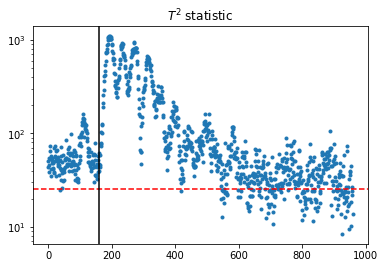

In [121]:
plt.figure(figsize=(6,4))
plt.semilogy(T2_test_final,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()

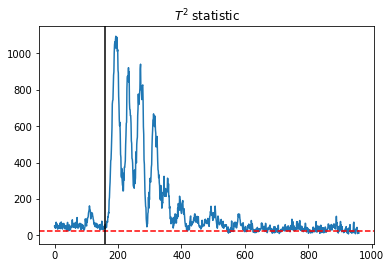

In [122]:
plt.figure(figsize=(6,4))
plt.plot(T2_test_final)
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()

In [123]:
print(f'T2: {(T2_test_final[160:]>T2_trlim).sum()/T2_test_final[160:].shape[0]}')

T2: 0.84625
